**Import Libraries**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


**Imprt the Files**

In [ ]:
file1 = pd.read_csv('churn-bigml-80.csv', header=0)
file2 = pd.read_csv('churn-bigml-20.csv', header=0)
print("Before combine train dataframe: ", file1.shape)
print("Before combine test dataframe: ", file2.shape)


Before combine train dataframe:  (2666, 20)
Before combine test dataframe:  (667, 20)


In [ ]:
  #Concat two file
  dataset = pd.concat([file1, file2], ignore_index=True)
  print("After combine test dataframe: ", dataset.shape)
  dataset.head()

After combine test dataframe:  (3333, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**From the dataset info above we see that we have a column called churn which has value of 'False' and 'True'. From the info we also see that we don't have any missing or null values. However we will have to convert some of the data types like Onject or bool to a number value**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


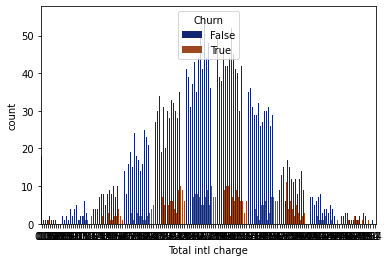

In [ ]:
sns.countplot(dataset["Total intl charge"], hue=dataset["Churn"], palette = "dark")
plt.show()


In [ ]:
#Map False = 0 and True = 1 for Churn column
dataset['Churn']=dataset['Churn'].replace([False,True],[0,1])
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Before we create training and testing sample it is important to remove features that are not important to us. So Let's Find Correlation and remove unnecessary**

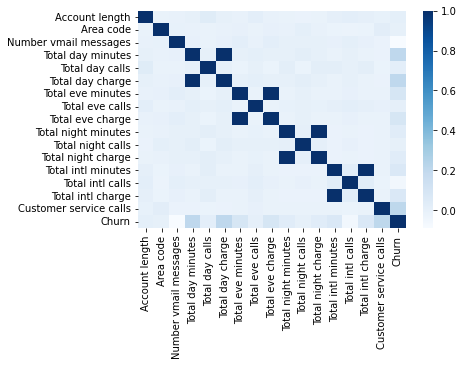

In [ ]:
correlations = dataset.corr()
correlations
sns.heatmap(correlations, cmap='Blues')
plt.show()

**From the above call we see that we do see some correlation between the coulumns so it is ok to use only one of them and drop the redundant columns. 

In [ ]:
#Removing correlated and unneccessary columns
col_to_drop = ['State', 'Area code', 'Total day charge', 'Total eve charge', 
               'Total night charge', 'Total intl charge']
dataset = dataset.drop(columns = col_to_drop, axis = 1)
dataset.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


**One-Hot Encoding**

In [ ]:
#One hot encoding to convert the categorical data
encodeCols = ['International plan','Voice mail plan']
oneHotEncoded = pd.get_dummies(dataset, columns = encodeCols)
newDataset = oneHotEncoded
churnCol = newDataset['Churn']
newDataset = newDataset.drop(['Churn'], axis = 1)
newDataset['TargetCol'] = churnCol
dataset = newDataset
print(dataset.shape)
dataset.head()

(3333, 16)


,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,TargetCol
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1,1,0,0,1,0
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1,1,0,0,1,0
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0,1,0,1,0,0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,1,1,0,0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,1,1,0,0


**Shuffle the datasets**

In [ ]:
from sklearn.utils import shuffle

dataset = shuffle(dataset, random_state=5)
dataset.head()


,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,TargetCol
1879,119,0,98.8,97,146.9,68,190.7,105,10.0,4,3,1,0,1,0,0
1518,172,0,211.7,100,198.7,101,301.7,136,6.5,9,1,1,0,1,0,0
1813,97,28,202.3,97,69.2,84,257.6,64,6.7,3,1,1,0,0,1,0
890,83,37,78.5,109,210.5,101,179.7,102,11.8,4,1,1,0,0,1,0
1343,99,0,115.5,75,218.1,111,254.9,98,11.5,7,7,1,0,1,0,1


**Create train and test data: 80% Train Dataset and 20% Test Dataset**

In [ ]:
# X is all column except the target column
X = dataset.iloc[:,0:15]
# y is the target column
y = dataset.iloc[:,-1]
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 1)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (2666, 15)
y_train shape:  (2666,)
X_test shape:  (667, 15)
y_test shape:  (667,)


**Let's take a look at a feature importance below by using RandomForestClassifier to see if we see disparities in our finding from the correlation**

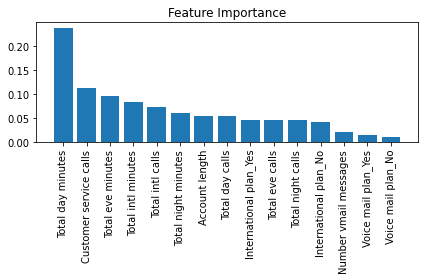

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#
# Train the mode
#
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train.values.ravel())
importances = forest.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

**Let's see if our training set is balanced or not**
> Indented block



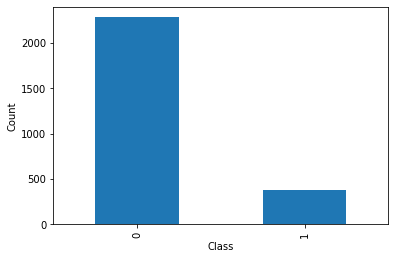

In [ ]:
pd.DataFrame(y_train).groupby("TargetCol").TargetCol.count()
#Plot the difference
pd.DataFrame(y_train).groupby("TargetCol").TargetCol.count().plot(kind="bar")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Balance the training data using SMOTETomek**


Before SMOTETomek XTrain size:  (2666, 15)
Before SMOTETomek YTrain size:  (2666,)

After SMOTETomek XTrain size:  (4538, 15)
After SMOTETomek YTrain size:  (4538,)

Before SMOTETomek Class count:  TargetCol
0    2284
1     382
Name: TargetCol, dtype: int64
After SMOTETomek Class count:  TargetCol
0    2269
1    2269
Name: TargetCol, dtype: int64



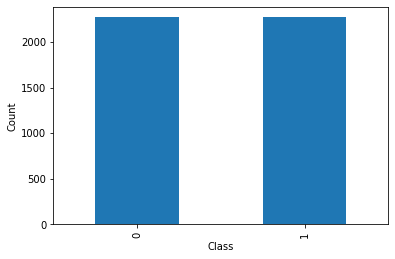

In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler


smote_tomek = SMOTETomek(random_state=888)
newXTrain, newYTrain = smote_tomek.fit_resample(X_train, y_train)

print("Before SMOTETomek XTrain size: ", X_train.shape)
print("Before SMOTETomek YTrain size: ", y_train.shape)
print("")
print("After SMOTETomek XTrain size: ", newXTrain.shape)
print("After SMOTETomek YTrain size: ", newYTrain.shape)
print("")
print("Before SMOTETomek Class count: ", pd.DataFrame(y_train).groupby("TargetCol").TargetCol.count())
print("After SMOTETomek Class count: ", pd.DataFrame(newYTrain).groupby("TargetCol").TargetCol.count())
print("")
pd.DataFrame(newYTrain).groupby("TargetCol").TargetCol.count().plot(kind="bar")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

X_train = newXTrain
y_train = newYTrain

s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [ ]:
#All Model Imports
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import hinge_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


**Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lrPredicted = lr.predict(X_test)
print(classification_report(y_test, lrPredicted))


              precision    recall  f1-score   support

           0       0.93      0.85      0.89       566
           1       0.44      0.65      0.53       101

    accuracy                           0.82       667
   macro avg       0.69      0.75      0.71       667
weighted avg       0.86      0.82      0.83       667



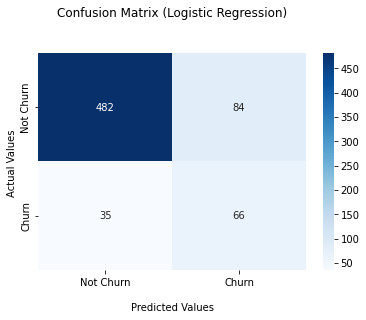

In [ ]:
#Confusion Matrix
mat = confusion_matrix(y_test,lrPredicted)
ax = sns.heatmap(mat, annot=True, fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix (Logistic Regression)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churn','Churn'])
ax.yaxis.set_ticklabels(['Not Churn','Churn'])

## Display the visualization of the Confusion Matrix.
plt.show()


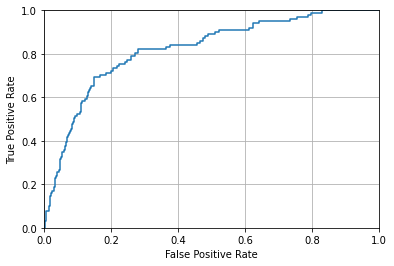

AUC score of: 0.8209250253647273


In [ ]:
#define metrics
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

print('AUC score of:', metrics.roc_auc_score(y_test, y_pred_proba))

**Decision Tree**

In [ ]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7).fit(X_train, y_train)
dtcPredicted = dtc.predict(X_test)
print(classification_report(y_test, dtcPredicted))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       566
           1       0.85      0.83      0.84       101

    accuracy                           0.95       667
   macro avg       0.91      0.90      0.91       667
weighted avg       0.95      0.95      0.95       667



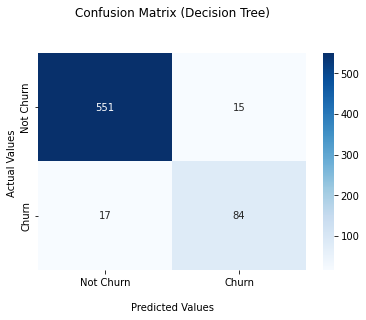

In [ ]:
#Confusion Matrix
mat = confusion_matrix(y_test, dtcPredicted)
ax = sns.heatmap(mat, annot=True, fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix (Decision Tree)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churn','Churn'])
ax.yaxis.set_ticklabels(['Not Churn','Churn'])

## Display the visualization of the Confusion Matrix.
plt.show()

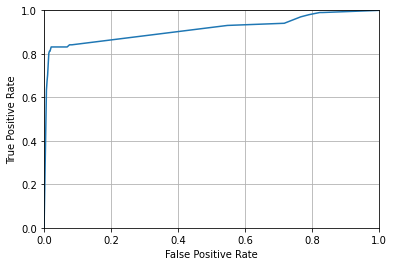

AUC score of: 0.913497533498933


In [ ]:
#define metrics
y_pred_proba = dtc.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

print('AUC score of:', metrics.roc_auc_score(y_test, y_pred_proba))

**Random Forest**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rfPredictions = rf.predict(X_test)
score = rf.score(X_test, y_test)
print(classification_report(y_test, rfPredictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       566
           1       0.86      0.79      0.82       101

    accuracy                           0.95       667
   macro avg       0.91      0.88      0.90       667
weighted avg       0.95      0.95      0.95       667



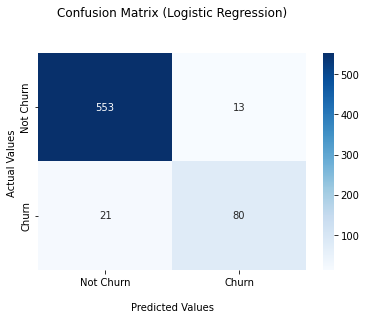

In [ ]:
#Confusion Matrix
mat = confusion_matrix(y_test, rfPredictions)
ax = sns.heatmap(mat, annot=True, fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix (Logistic Regression)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churn','Churn'])
ax.yaxis.set_ticklabels(['Not Churn','Churn'])

## Display the visualization of the Confusion Matrix.
plt.show()

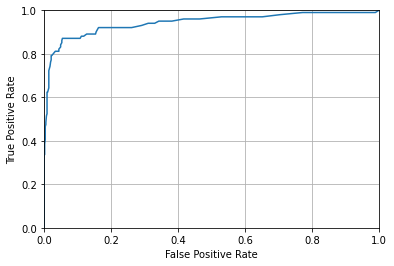

AUC score of: 0.9434454046111326


In [ ]:
#define metrics
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

print('AUC score of:', metrics.roc_auc_score(y_test, y_pred_proba))

**SVM**

In [ ]:
svc = SVC(kernel='poly', degree=2, probability=True)
svc.fit(X_train, y_train)
svcPredicted = svc.predict(X_test)
print(classification_report(y_test,svcPredicted))
print("Hinge loss", hinge_loss(y_test,svcPredicted))



              precision    recall  f1-score   support

           0       0.95      0.92      0.93       566
           1       0.61      0.73      0.66       101

    accuracy                           0.89       667
   macro avg       0.78      0.82      0.80       667
weighted avg       0.90      0.89      0.89       667

Hinge loss 0.9610194902548725


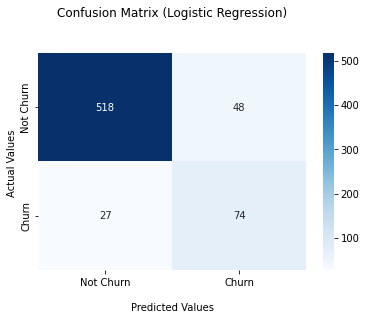

In [ ]:
# confusion matrix
mat = confusion_matrix(y_test, svcPredicted)
ax = sns.heatmap(mat, annot=True, fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix (Logistic Regression)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churn','Churn'])
ax.yaxis.set_ticklabels(['Not Churn','Churn'])

## Display the visualization of the Confusion Matrix.
plt.show()

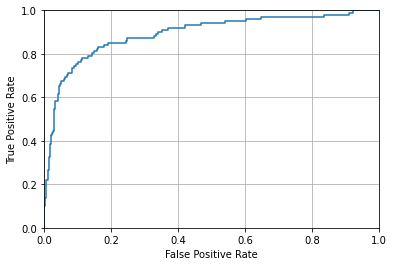

AUC score of: 0.892156176748417


In [ ]:
y_pred_proba = svc.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

print('AUC score of:', metrics.roc_auc_score(y_test, y_pred_proba))